In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series,DataFrame

# machine learning
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC, LinearSVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB

In [2]:
# importing the data
titanic_travel = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full_data = [titanic_travel, test]

In [3]:
titanic_travel.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
print(len(titanic_travel))

891


In [5]:
print(len(titanic_travel.columns))

12


In [6]:
titanic_travel['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

In [7]:
titanic_travel['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [8]:
titanic_travel['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [9]:
titanic_travel['Cabin'].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F33                3
F2                 3
D                  3
E101               3
C22 C26            3
C68                2
B28                2
D26                2
F4                 2
E25                2
B35                2
E67                2
D36                2
C78                2
C126               2
C124               2
B57 B59 B63 B66    2
D20                2
C93                2
B51 B53 B55        2
D33                2
F G73              2
C83                2
C92                2
B18                2
C2                 2
B58 B60            2
                  ..
E63                1
B38                1
D7                 1
C45                1
B101               1
B73                1
D50                1
D46                1
C104               1
C148               1
D9                 1
C30                1
A20                1
A7                 1
B37                1
C50                1
E46          

In [10]:
titanic_travel['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
titanic_travel.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic_travel.info()
print('---------------------------------')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object

In [13]:
#Feature Engineering

In [14]:
titanic_travel[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
titanic_travel[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [17]:
titanic_travel[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [18]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [19]:
titanic_travel[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [20]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (titanic_travel[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [21]:
titanic_travel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1


In [22]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_travel["Embarked"] = titanic_travel["Embarked"].fillna("S")
# plot
sns.factorplot('Embarked','Survived', data=titanic_travel,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_travel, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_travel, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_travel[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','Q','C'],ax=axis3)

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_travel['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(titanic_travel['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_travel = titanic_travel.join(embark_dummies_titanic)
test = test.join(embark_dummies_test)

titanic_travel.drop(['Embarked'], axis=1,inplace=True)
test.drop(['Embarked'], axis=1,inplace=True)

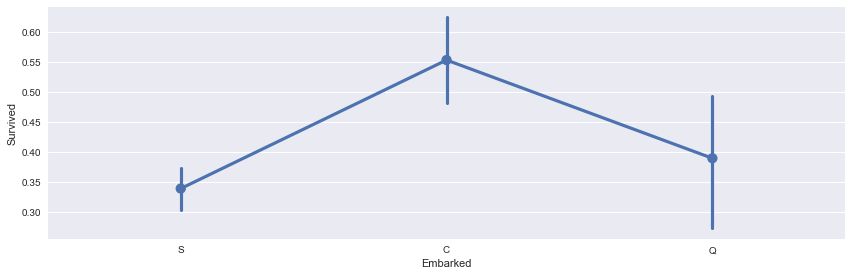

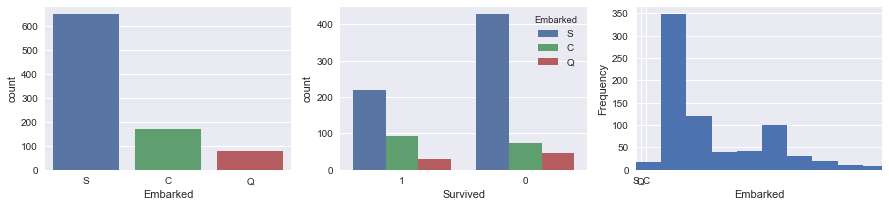

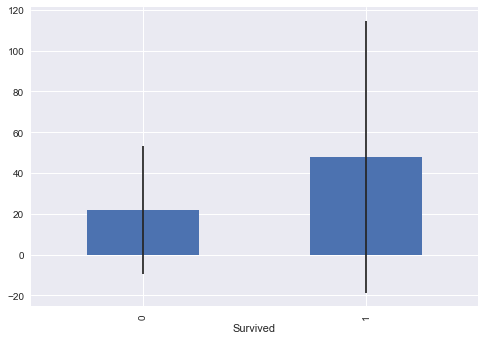

In [23]:
# Fare

# only for test_df, since there is a missing "Fare" values
test["Fare"].fillna(test["Fare"].median(), inplace=True)

# convert from float to int
titanic_travel['Fare'] = titanic_travel['Fare'].astype(int)
test['Fare']    = test['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_travel["Fare"][titanic_travel["Survived"] == 0]
fare_survived     = titanic_travel["Fare"][titanic_travel["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_travel['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)
plt.show()

C:\Users\Maanvitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Maanvitha\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


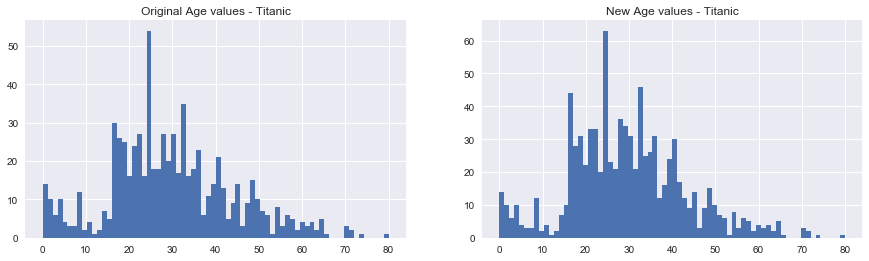

In [24]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_travel
average_age_titanic   = titanic_travel["Age"].mean()
std_age_titanic       = titanic_travel["Age"].std()
count_nan_age_titanic = titanic_travel["Age"].isnull().sum()

# get average, std, and number of NaN values in test
average_age_test   = test["Age"].mean()
std_age_test       = test["Age"].std()
count_nan_age_test = test["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_travel['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_travel["Age"][np.isnan(titanic_travel["Age"])] = rand_1
test["Age"][np.isnan(test["Age"])] = rand_2

# convert from float to int
titanic_travel['Age'] = titanic_travel['Age'].astype(int)
test['Age']    = test['Age'].astype(int)
        
# plot new Age Values
titanic_travel['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)
plt.show()

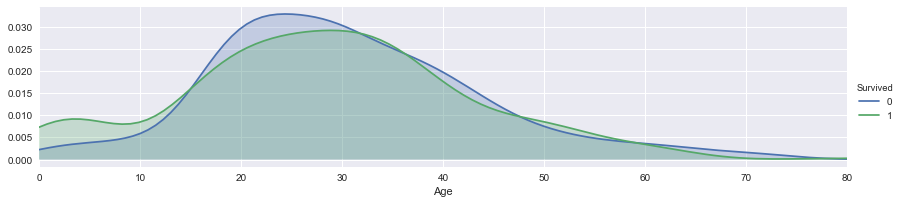

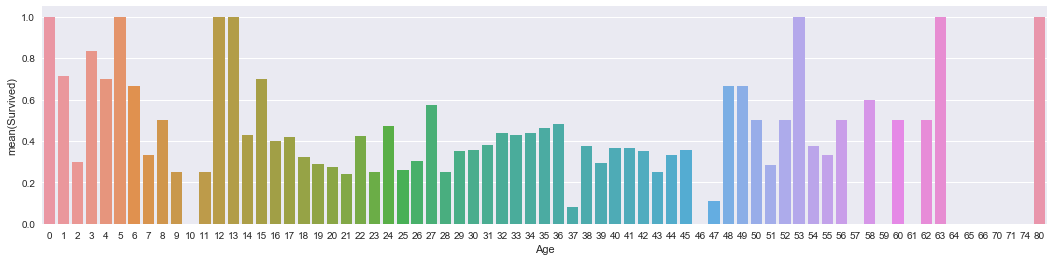

In [25]:
# .... continue with plot Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_travel, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_travel['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_travel[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)
plt.show()

In [26]:
titanic_travel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,2,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,2,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,NaN,1,1,0,0


C:\Users\Maanvitha\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


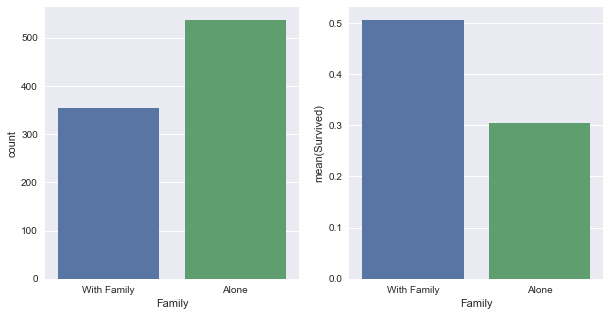

In [27]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_travel['Family'] =  titanic_travel["Parch"] + titanic_travel["SibSp"]
titanic_travel['Family'].loc[titanic_travel['Family'] > 0] = 1
titanic_travel['Family'].loc[titanic_travel['Family'] == 0] = 0

test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

# drop Parch & SibSp
titanic_travel = titanic_travel.drop(['SibSp','Parch'], axis=1)
test = test.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_travel, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_travel[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)
plt.show()

In [28]:
titanic_travel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamilySize,IsAlone,C,Q,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7,NaN,2,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71,C85,2,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7,NaN,1,1,0,0,0


In [29]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_travel['Person'] = titanic_travel[['Age','Sex']].apply(get_person,axis=1)
test['Person']    = test[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_travel.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_travel['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_travel = titanic_travel.join(person_dummies_titanic)
test = test.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_travel, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_travel[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

titanic_travel.drop(['Person'],axis=1,inplace=True)
test.drop(['Person'],axis=1,inplace=True)

In [30]:
titanic_travel.head(3)

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,FamilySize,IsAlone,C,Q,Family,Child,Female
0,1,0,3,"Braund, Mr. Owen Harris",22,A/5 21171,7,NaN,2,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71,C85,2,0,1,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7,NaN,1,1,0,0,0,0,1


In [31]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_travel,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_travel['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_travel.drop(['Pclass'],axis=1,inplace=True)
test.drop(['Pclass'],axis=1,inplace=True)

titanic_travel = titanic_travel.join(pclass_dummies_titanic)
test = test.join(pclass_dummies_test)

In [32]:
titanic_travel.head(3)

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,FamilySize,IsAlone,C,Q,Family,Child,Female,Class_1,Class_2
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7,NaN,2,0,0,0,1,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71,C85,2,0,1,0,1,0,1,1,0
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7,NaN,1,1,0,0,0,0,1,0,0


In [33]:
test.head(3)

,PassengerId,Name,Age,Ticket,Fare,Cabin,FamilySize,IsAlone,C,Q,Family,Child,Female,Class_1,Class_2
0,892,"Kelly, Mr. James",34,330911,7,NaN,1,1,0,0,0,0,0,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47,363272,7,NaN,2,0,1,0,1,0,1,0,0
2,894,"Myles, Mr. Thomas Francis",62,240276,9,NaN,1,1,0,0,0,0,0,0,1


In [34]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_travel.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)

In [35]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_travel = titanic_travel.drop(['PassengerId','Name','Ticket'], axis=1)
test    = test.drop(['Name','Ticket'], axis=1)

In [36]:
titanic_travel.head(4)

,Survived,Age,Fare,FamilySize,IsAlone,C,Q,Family,Child,Female,Class_1,Class_2
0,0,22,7,2,0,0,0,1,0,0,0,0
1,1,38,71,2,0,1,0,1,0,1,1,0
2,1,26,7,1,1,0,0,0,0,1,0,0
3,1,35,53,2,0,0,0,1,0,1,1,0


In [37]:
# Importing the dataset
#dataset = pd.read_csv('Social_Network_Ads.csv')
X = titanic_travel.iloc[:, 1:11].values
y = titanic_travel.iloc[:, 0].values

In [38]:
# define training and testing sets
#X_train = titanic_travel.drop("Survived",axis=1)
#Y_train = titanic_travel["Survived"]
#X_test  = test.drop("PassengerId",axis=1).copy()
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\Maanvitha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Maanvitha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [40]:
# Fitting classifier to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = None)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [46]:
cm

array([[118,  21],
       [ 20,  64]])

In [48]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: X has 2 features per sample; expecting 10

In [ ]:
#Break

In [39]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.82267115600448937

In [40]:
# Support Vector Machines

# svc = SVC()

# svc.fit(X_train, Y_train)

# Y_pred = svc.predict(X_test)

# svc.score(X_train, Y_train)

In [41]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.96745230078563416

In [42]:
# knn = KNeighborsClassifier(n_neighbors = 3)

# knn.fit(X_train, Y_train)

# Y_pred = knn.predict(X_test)

# knn.score(X_train, Y_train)

In [43]:
# Gaussian Naive Bayes

# gaussian = GaussianNB()

# gaussian.fit(X_train, Y_train)

# Y_pred = gaussian.predict(X_test)

# gaussian.score(X_train, Y_train)

In [44]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_travel.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Age,-0.017054
1,Fare,0.003419
2,FamilySize,-0.481616
3,IsAlone,-0.694603
4,C,0.358037
5,Q,0.191711
6,Family,-0.018029
7,Child,2.527837
8,Female,2.863065
9,Class_1,1.696698


In [45]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)